In [1]:
import numpy as np
import pandas as pd

SEED = 12345
np.random.seed(SEED)

# Load original dataset
- dataset can be obtained from https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate
- to recreate the processed dataset, put `beer_reviews.csv` in `./data/beeradvocate/` folder

In [2]:
DATA_FOLDER = "./data/beeradvocate/"

ratings = pd.read_csv(DATA_FOLDER + "beer_reviews.csv")

ratings.head()

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [3]:
ratings.columns

Index(['index', 'brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

- rename `beer_beerid` to `item_id`
- we use `review_overall` as target (new column name: `rating`)

In [4]:
ratings.columns = ['index', 'brewery_id', 'brewery_name', 'timestamp', 'rating',
       'review_aroma', 'review_appearance', 'userId', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'item_id']

In [5]:
ratings["datetime"] = pd.to_datetime(ratings["timestamp"], unit = "s")

In [6]:
ratings.sort_values(["userId","timestamp"], inplace=True)
ratings

,index,brewery_id,brewery_name,timestamp,rating,review_aroma,review_appearance,userId,beer_style,review_palate,review_taste,beer_name,beer_abv,item_id,datetime
614509,614509,199,Ballast Point Brewing Company,1205561385,5.0,4.0,3.5,0110x011,American Double / Imperial IPA,4.0,4.0,Dorado Double IPA,9.6,10386,2008-03-15 06:09:45
182729,182729,396,AleSmith Brewing Company,1205823873,5.0,5.0,4.0,0110x011,American Double / Imperial IPA,4.5,4.5,YuleSmith (Summer),8.5,7284,2008-03-18 07:04:33
1134674,1134674,863,Russian River Brewing Company,1207011338,5.0,5.0,5.0,0110x011,American Double / Imperial IPA,4.5,4.5,Pliny The Elder,8.0,7971,2008-04-01 00:55:38
462893,462893,559,Speakeasy Ales & Lagers,1207362193,4.5,4.0,4.0,0110x011,American Double / Imperial IPA,3.5,4.0,Double Daddy Imperial India Pale Ale,9.5,25283,2008-04-05 02:23:13
886485,886485,147,Stone Brewing Co.,1208211124,5.0,5.0,4.0,0110x011,American Black Ale,4.0,5.0,Stone Sublimely Self-Righteous Ale,8.7,38470,2008-04-14 22:12:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186396,1186396,10099,Dogfish Head Brewery,1253919442,3.0,4.0,4.5,NaN,Pumpkin Ale,4.0,3.0,Punkin Ale,7.0,6260,2009-09-25 22:57:22
639093,639093,30,Avery Brewing Company,1254086555,4.5,4.5,5.0,NaN,American Barleywine,5.0,4.5,Hog Heaven Barley Wine,9.2,1490,2009-09-27 21:22:35
957038,957038,193,Anderson Valley Brewing Company,1254112073,3.0,4.0,4.5,NaN,Dubbel,3.0,3.0,Brother David's Belgian-style Double Ale,9.0,4168,2009-09-28 04:27:53
271748,271748,68,Flying Dog Brewery,1254265224,4.0,3.5,4.0,NaN,Baltic Porter,4.0,3.5,Gonzo Imperial Porter,9.2,24071,2009-09-29 23:00:24


In [7]:
ratings.dropna(inplace=True)
ratings.shape

(1518478, 15)

In [8]:
ratings["sessionId"] = 1

<Axes: xlabel='datetime', ylabel='Count'>

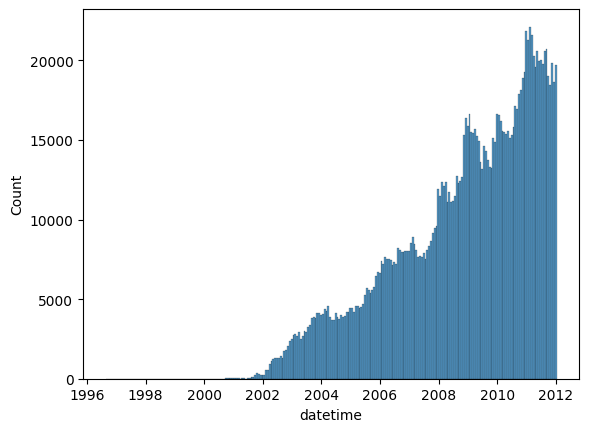

In [9]:
import seaborn as sns
sns.histplot(ratings["datetime"])

### Limit to only recent data (2008+)

In [10]:
ratings_recent = ratings.loc[ratings["datetime"] >= np.datetime64('2008', 'Y')]
ratings_recent.shape

(1037331, 16)

In [11]:
len(ratings_recent.item_id.unique()),len(ratings_recent.userId.unique())

(39705, 26122)

In [12]:
ratings_recent["rating"].value_counts()

rating
4.0    392460
4.5    216380
3.5    197561
3.0    101692
5.0     58960
2.5     34187
2.0     22549
1.5      7228
1.0      6314
Name: count, dtype: int64

## Data binarization
- ratings < 2.5 are negative (-1), ratings > 3.5 are positive (+1); remove middle ones
- for testing, identify user-session pairs where there is at least three positive and three negative rating

In [13]:
df = ratings_recent.loc[~((ratings_recent.rating >=2.5)&(ratings_recent.rating <=3.5)) ]
df.shape

(703891, 16)

In [14]:
df.loc[df.rating <2.5,"rating"] = -1
df.loc[df.rating >3.5,"rating"] = 1
df

,index,brewery_id,brewery_name,timestamp,rating,review_aroma,review_appearance,userId,beer_style,review_palate,review_taste,beer_name,beer_abv,item_id,datetime,sessionId
614509,614509,199,Ballast Point Brewing Company,1205561385,1.0,4.0,3.5,0110x011,American Double / Imperial IPA,4.0,4.0,Dorado Double IPA,9.6,10386,2008-03-15 06:09:45,1
182729,182729,396,AleSmith Brewing Company,1205823873,1.0,5.0,4.0,0110x011,American Double / Imperial IPA,4.5,4.5,YuleSmith (Summer),8.5,7284,2008-03-18 07:04:33,1
1134674,1134674,863,Russian River Brewing Company,1207011338,1.0,5.0,5.0,0110x011,American Double / Imperial IPA,4.5,4.5,Pliny The Elder,8.0,7971,2008-04-01 00:55:38,1
462893,462893,559,Speakeasy Ales & Lagers,1207362193,1.0,4.0,4.0,0110x011,American Double / Imperial IPA,3.5,4.0,Double Daddy Imperial India Pale Ale,9.5,25283,2008-04-05 02:23:13,1
886485,886485,147,Stone Brewing Co.,1208211124,1.0,5.0,4.0,0110x011,American Black Ale,4.0,5.0,Stone Sublimely Self-Righteous Ale,8.7,38470,2008-04-14 22:12:04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521081,521081,113,Samuel Smith Old Brewery (Tadcaster),1237681606,1.0,4.5,4.5,zythus,English Porter,5.0,5.0,"Samuel Smith's, The Famous Taddy Porter",5.0,572,2009-03-22 00:26:46,1
520548,520548,113,Samuel Smith Old Brewery (Tadcaster),1242257696,1.0,5.0,5.0,zythus,Euro Pale Lager,5.0,5.0,Samuel Smith's Pure Brewed Lager Beer,5.0,574,2009-05-13 23:34:56,1
516121,516121,113,Samuel Smith Old Brewery (Tadcaster),1243812668,1.0,4.0,4.5,zythus,English Brown Ale,5.0,4.5,Samuel Smith's Nut Brown Ale,5.0,576,2009-05-31 23:31:08,1
1486864,1486864,23980,Yuengling Brewery,1267120909,1.0,4.0,4.0,zythus,Bock,4.5,4.0,Yuengling Bock,5.1,47812,2010-02-25 18:01:49,1


In [15]:
# create a user_session identifier
df = df.copy()
df['user_session_id'] = df['userId'].astype(str) + '_' + df['sessionId'].astype(str)
df = df.sort_values(by=['user_session_id', 'timestamp'])

### Define sessions suitable for testing

In [16]:
testable_sessions = df.groupby('user_session_id').agg({"userId": "first", "rating": "count"}).rename(columns={"rating": "ratingsCount"}).reset_index()
testable_sessions["positiveCount"] = 0
positive_counts = df[df.rating == 1.].groupby('user_session_id').rating.count()
testable_sessions.loc[testable_sessions["user_session_id"].isin(positive_counts.index) ,"positiveCount"] = testable_sessions.loc[testable_sessions["user_session_id"].isin(positive_counts.index) ,"user_session_id"].apply(lambda x: positive_counts[x])
testable_sessions["negativeCount"] = testable_sessions["ratingsCount"] - testable_sessions["positiveCount"]

testable_sessions

,user_session_id,userId,ratingsCount,positiveCount,negativeCount
0,0110x011_1,0110x011,115,112,3
1,01Ryan10_1,01Ryan10,1,1,0
2,02maxima_1,02maxima,3,3,0
3,04101Brewer_1,04101Brewer,2,2,0
4,05Harley_1,05Harley,128,128,0
...,...,...,...,...,...
24569,zymrgy_1,zymrgy,3,3,0
24570,zymurgy4all_1,zymurgy4all,21,21,0
24571,zymurgywhiz_1,zymurgywhiz,2,2,0
24572,zythus_1,zythus,6,6,0


In [17]:
print(len(testable_sessions))
# we need at least 3 positive interactions and 3 negative interactions
testable_sessions = testable_sessions[(testable_sessions.positiveCount >= 3) & (testable_sessions.negativeCount >= 3)]
print(len(testable_sessions))

24574
2517


### Distinguish between validation and test sessions

In [18]:
# shuffle rows
testable_sessions = testable_sessions.sample(frac=1, random_state=SEED).reset_index(drop=True)
# add sessions randomly to validation set (0) or one of five CV splits (1-5)
testable_sessions["split"] = testable_sessions.index.values

split_number_to_string = {
    0: "val",  # 25% of sessions are validation
    1: "test",
    2: "test",
    3: "test",
}

testable_sessions["split"] = testable_sessions["split"].apply(lambda x: x % 4).apply(lambda x: split_number_to_string[x])

In [19]:
testable_sessions

,user_session_id,userId,ratingsCount,positiveCount,negativeCount,split
0,Ragingbull_1,Ragingbull,147,138,9,val
1,argock_1,argock,730,721,9,test
2,StormKing47_1,StormKing47,56,53,3,test
3,OzarkElmo_1,OzarkElmo,92,87,5,test
4,1759Girl_1,1759Girl,125,114,11,val
...,...,...,...,...,...,...
2512,richkrull_1,richkrull,217,202,15,val
2513,KenC411_1,KenC411,21,16,5,test
2514,GRG1313_1,GRG1313,414,330,84,test
2515,rootbeerman_1,rootbeerman,270,261,9,test


In [20]:
# check if every row is a unique user session
assert len(testable_sessions) == testable_sessions.user_session_id.nunique()

In [21]:
for split in ["train", "val", "test"]:
    print(f"number of testable sessions in split {split}: {len(testable_sessions[testable_sessions.split == split])}")

number of testable sessions in split train: 0
number of testable sessions in split val: 630
number of testable sessions in split test: 1887


In [22]:
# map user_session_id to split
user_session_id_to_split = {usid: split for usid, split in zip(testable_sessions.user_session_id.values, testable_sessions.split.values)}

In [23]:
# assign dataframe entries to split
df["split"] = df["user_session_id"].apply(lambda x: user_session_id_to_split.get(x, "train"))

## Downsample the training data

In [24]:
train_df = df[df.split == "train"]
eval_df = df[df.split != "train"]

# to simulate real-world data sparsity, we subsample rows of train df in a stratified manner (per item)
# we modify the long-tail distribution to make it sparser
# set count x of every item to x**(2/3)
# max count will be 100, and the distribution will be long tailed
print(train_df.item_id.value_counts().describe())
train_df = train_df.groupby('item_id', group_keys=False).apply(
    lambda x: x.sample(
        min(
            round(len(x)**(2/3)), # at most this number
            100,  # at most 100
        ),
    random_state=SEED,
    )
)
print(train_df.item_id.value_counts().describe())
# in training split, keep only interactions with (positive) rating 1
train_df = train_df[train_df.rating == 1.]

df = pd.concat([train_df, eval_df])

count    17707.000000
mean        13.555938
std         47.063999
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max       1251.000000
Name: count, dtype: float64
count    17707.000000
mean         4.047495
std          6.845939
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        100.000000
Name: count, dtype: float64


/tmp/ipykernel_946/1933004896.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = train_df.groupby('item_id', group_keys=False).apply(


In [25]:
df.shape

(532934, 18)

In [26]:
df.groupby("split")[["index"]].count()

,index
split,
test,349533
train,69078
val,114323


## Save processed dataset

In [27]:
df.to_csv(DATA_FOLDER + "ratings_processed_BeerAdvocate.csv", index=False)